## Testing SVD cutoff shaking

In [26]:
import sys
sys.path.append('../..')

In [27]:
import numpy as np
import torch

from mps.models import MPS, ComplexTensor
from mps.utils import build_ghz_plus, train_from_dict
from mps.qutip_utils import get_ghz_state as get_qutip_ghz

import matplotlib.pyplot as plt
import datetime
import json

Pick system size, dimensionality of local hilbert space, and initial bond dim

In [28]:
L=4
local_dim=2
bond_dim=2

In [29]:
# dev = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
dev = torch.device("cpu")

Initialize the MPS model

In [30]:
psi = MPS(L=L, local_dim=local_dim, bond_dim=bond_dim)

In [31]:
psi.to(device=dev)

In [32]:
fname_settings = "../../datasets/mps_sampled/ghz_plus_L=%d_angles.npy"%L
fname_samples = "../../datasets/mps_sampled/ghz_plus_L=%d_outcomes.npy"%L
mps_path = "../../datasets/mps_sampled/ghz_plus_L=%d_state"%L
Nsamp=20000


In [33]:
fname_training_settings = "data/training_settings.json"
with open(fname_training_settings) as f:
    training_settings = json.load(f)

In [34]:
trloss = np.load("data/trlosses.npy")
valloss = np.load("data/vallosses.npy")

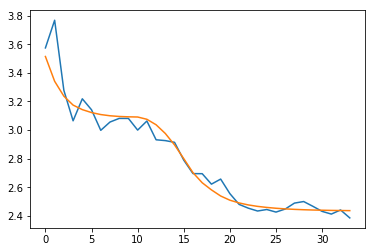

In [35]:
fig, ax = plt.subplots()
plt.plot(trloss, label="tr")
plt.plot(valloss, label="val")

In [36]:
training_settings["mps_path"] = mps_path


Max number of singular values to keep, and cutoff below which to truncate singular values

In [37]:
model, logdict, meta = train_from_dict(fname_samples, fname_settings, training_settings,N=Nsamp,
                                   record_eigs=True,record_s2=True,verbose=True,
                                   compute_overlaps=False,samples_per_epoch=20)

Successfully loaded 20000 settings, samples for system of size L=4
Loaded the following settings:
lr_scale = 8.702653e-04
lr_timescale = 7.831614e+03
s2_scale = 1.640444e-04
s2_timescale = 4.272079e+02
epochs = 3.400000e+01
cutoff = 1.000000e-03
max_sv = 2.500000e+01
batch_size = 2.560000e+02
Hold early cutoff: True
loading ground truth MPS from  ../../datasets/mps_sampled/ghz_plus_L=4_state
Training on system size 4 with 20000 samples
Finished epoch 0 in 1.507 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 1 in 1.525 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 2 in 1.499 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 3 in 1.520 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 4 in 1.511 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 5 in 1.514 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 6 in 1.518 sec
Model shape:  [(1, 2), (2, 2), (2, 2), (2, 1)]
Finished epoch 7 in 1

In [38]:
fidelity_mps = logdict['fidelity_mps']

loss = logdict['loss']
max_bond_dim = logdict['max_bond_dim']
eigs = logdict['eigenvalues']
s2 = logdict['s2']


Text(0.5,1,'batch NLL loss')

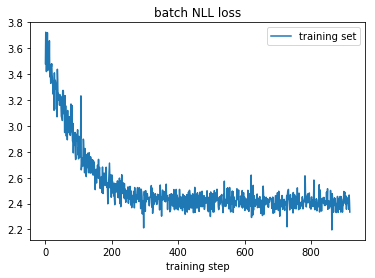

In [39]:
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(loss, label='training set')
plt.legend()
plt.xlabel("training step")
plt.title("batch NLL loss")


Text(0.5,1,'Ground truth fidelity')

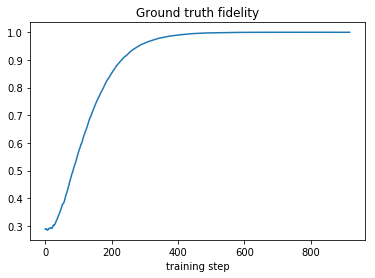

In [40]:
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(fidelity_mps)
plt.xlabel("training step")
plt.title("Ground truth fidelity")


Text(0.5,1,'Max bond dimension')

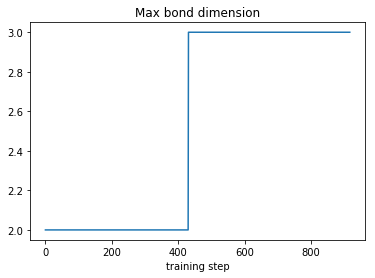

In [42]:
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(max_bond_dim)
plt.xlabel("training step")
plt.title("Max bond dimension")
